In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

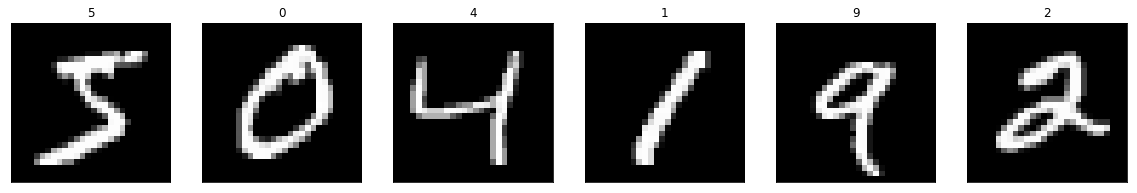

In [4]:
fig = plt.figure(figsize=(20, 20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

In [5]:
# Rescale [0, 255] -> [0, 1]
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [6]:
# One-hot encode labels
from keras.utils import np_utils
print ('Integer-valued labes')
print (y_train[:10])

# One-hot encode
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print ('Encoded labes')
print (y_train[:10])

Integer-valued labes
[5 0 4 1 9 2 1 3 1 4]
Encoded labes
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

model = Sequential()
# MLP only takes vectors as input; vectorize all matrices
# Flatten layer takes the matrix and converts to a vector
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
# We use categorical cross entropy for multi-class classification
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Evaluate on test set pre-training
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]
print 'Test Accuracy: %.2f%%' % accuracy

Test Accuracy: 12.44%


In [9]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 105us/step - loss: 0.2802 - acc: 0.9127 - val_loss: 0.1152 - val_acc: 0.9654

Epoch 00001: val_loss improved from inf to 0.11516, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 5s 115us/step - loss: 0.1131 - acc: 0.9646 - val_loss: 0.1014 - val_acc: 0.9689

Epoch 00002: val_loss improved from 0.11516 to 0.10139, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 5s 108us/step - loss: 0.0787 - acc: 0.9757 - val_loss: 0.0912 - val_acc: 0.9718

Epoch 00003: val_loss improved from 0.10139 to 0.09118, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 5s 101us/step - loss: 0.0658 - acc: 0.9798 - val_loss: 0.0914 - val_acc: 0.9747

Epoch 00004: val_loss did not improve from 0.09118
Epoch 5/10
48000/48000 [==============================] - 4s 89us

In [10]:
# Load model with best weights
model.load_weights('mnist.model.best.hdf5')

# Evaluate the trained model
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]
print 'Test Accuracy: %.2f%%' % accuracy

Test Accuracy: 98.17%


In [11]:
# Increase the number of nodes in hidden layers to see if the model overfits
model = Sequential()
# MLP only takes vectors as input; vectorize all matrices
# Flatten layer takes the matrix and converts to a vector
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.overfit.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]
print 'Test Accuracy: %.2f%%' % accuracy

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_4 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                20490     
Total params: 5,824,522
Trainable params: 5,824,522
Non-trainable params: 0
_________________________________________________________________


Adding more nodes in hidden layers clearly led to overfitting, as seen by the increase in validation loss, decrease in training loss, and improvements in accuracy

In [12]:
# Decrease the number of nodes in hidden layers to see if the model underfits
model = Sequential()
# MLP only takes vectors as input; vectorize all matrices
# Flatten layer takes the matrix and converts to a vector
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.underfit.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]
print 'Test Accuracy: %.2f%%' % accuracy

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Train 

Removing nodes from hidden layers appears to have led to mild underfitting, as seen by the increase in validation and training loss, and worsening of accuracy

In [13]:
# Increase the number of hidden layers to see if the model overfits
model = Sequential()
# MLP only takes vectors as input; vectorize all matrices
# Flatten layer takes the matrix and converts to a vector
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.overfit2.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]
print 'Test Accuracy: %.2f%%' % accuracy

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
__________

The additional hidden layer seems to have worsened our validation loss marginally, this indicates overfitting.

In [14]:
# Decrease the number of hidden layers to see if the model overfits
model = Sequential()
# MLP only takes vectors as input; vectorize all matrices
# Flatten layer takes the matrix and converts to a vector
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.underfit2.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]
print 'Test Accuracy: %.2f%%' % accuracy

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 55us/step - loss: 0.3016 - acc: 0.9139 - val_loss: 0.1461 - val_acc: 0.9580

Epoch 00001: val_loss improved from inf to 0.14605, saving model to mnist.model.

Removing one layer has improved the overall model! Validation and training loss is lower, and training set accuracy is higher than our original model!

In [15]:
# Remove dropout layer to see evidence of overfit
model = Sequential()
# MLP only takes vectors as input; vectorize all matrices
# Flatten layer takes the matrix and converts to a vector
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.overfit3.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]
print 'Test Accuracy: %.2f%%' % accuracy

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 80us/step - loss: 0.2541 - acc: 0.9215 - val_loss: 0.1206 - val_acc: 0.9659

Epoch 00001: val_loss improved from inf to 0.12058, saving model to mnist.model.

Test accuracy is slightly lower if we drop the Dropout layers, and validation loss is slightly worse. Hence this model is a little more overfit than our original model

In [16]:
# Remove ReLU to see if accuracy drops
model = Sequential()
# MLP only takes vectors as input; vectorize all matrices
# Flatten layer takes the matrix and converts to a vector
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.underfit3.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]
print 'Test Accuracy: %.2f%%' % accuracy

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Trai

Overall the model is significantly worse if we remove ReLu. The default softmax activation just does not work well for this.

In [17]:
# Remove image pre-processing step to see how it impacts model accuracy
(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

model = Sequential()
# MLP only takes vectors as input; vectorize all matrices
# Flatten layer takes the matrix and converts to a vector
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.underfit4.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]
print 'Test Accuracy: %.2f%%' % accuracy

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Trai

The data pre-processing step is crucial to the model performance. Test accuracy takes a huge hit if we do not convert the pixel values to range [0, 1]

In [18]:
# Redo the preprocessing step
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [19]:
# Try a different optimizer

model = Sequential()
# MLP only takes vectors as input; vectorize all matrices
# Flatten layer takes the matrix and converts to a vector
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.optimizer.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]
print 'Test Accuracy: %.2f%%' % accuracy

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Trai

The test accuracy improves and validation loss decreases! We have a better model with the adadelta optimizer!

In [20]:
# Increase batch size

model = Sequential()
# MLP only takes vectors as input; vectorize all matrices
# Flatten layer takes the matrix and converts to a vector
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.batch.increase.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=1024, epochs=10, validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]
print 'Test Accuracy: %.2f%%' % accuracy

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Trai

Increasing batch size degraded the accuracy of the model, and led to a slight overfit.

In [21]:
# Decrease batch size

model = Sequential()
# MLP only takes vectors as input; vectorize all matrices
# Flatten layer takes the matrix and converts to a vector
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.batch.decrease.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]
print 'Test Accuracy: %.2f%%' % accuracy

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Trai

In [22]:
# Train possibly the best-est model, by combining the two models that did well before
# Decrease the number of hidden layers to see if the model overfits
model = Sequential()
# MLP only takes vectors as input; vectorize all matrices
# Flatten layer takes the matrix and converts to a vector
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.bestest.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]
print 'Test Accuracy: %.2f%%' % accuracy

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 68us/step - loss: 0.3438 - acc: 0.9012 - val_loss: 0.1844 - val_acc: 0.9489

Epoch 00001: val_loss improved from inf to 0.18443, saving model to mnist.model.